In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", None)

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data Gathering

In [4]:
data = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [5]:
data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [7]:
data[data['batting_team'] == 'Chennai Super Kings']['striker'].unique()

array(['MEK Hussey', 'JDP Oram', 'SK Raina', 'S Badrinath', 'ML Hayden',
       'PA Patel', 'MS Dhoni', 'JA Morkel', 'S Vidyut', 'SP Fleming',
       'MS Gony', 'Joginder Sharma', 'M Muralitharan', 'M Ntini',
       'S Anirudha', 'CK Kapugedera', 'L Balaji', 'A Mukund',
       'T Thushara', 'A Flintoff', 'SB Jakati', 'M Vijay', 'GJ Bailey',
       'R Ashwin', 'S Tyagi', 'JM Kemp', 'KB Arun Karthik',
       'DE Bollinger', 'SB Styris', 'S Randiv', 'WP Saha', 'DJ Bravo',
       'F du Plessis', 'RA Jadeja', 'KMDN Kulasekara', 'B Laughlin',
       'AS Rajpoot', 'CH Morris', 'MM Sharma', 'DR Smith', 'BB McCullum',
       'M Manhas', 'DJ Hussey', 'A Nehra', 'P Negi', 'RG More',
       'KM Jadhav', 'AT Rayudu', 'SR Watson', 'MA Wood', 'Imran Tahir',
       'Harbhajan Singh', 'DL Chahar', 'SW Billings', 'DR Shorey',
       'SN Thakur', 'MJ Santner', 'SM Curran', 'RD Gaikwad',
       'N Jagadeesan', 'MM Ali', 'RV Uthappa'], dtype=object)

# Data Preprocessing 

In [8]:
dhoni = data[data['striker'] == 'MS Dhoni']

In [9]:
dhoni.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
560,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,16.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,MA Khote,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,19.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,JDP Oram,MA Khote,0,0,NaN,NaN,NaN,NaN,NaN,caught,MS Dhoni,NaN,NaN


In [10]:
dhoni.shape

(3604, 22)

In [11]:
dhoni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 559 to 207133
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                3604 non-null   int64  
 1   season                  3604 non-null   int64  
 2   start_date              3604 non-null   object 
 3   venue                   3604 non-null   object 
 4   innings                 3604 non-null   int64  
 5   ball                    3604 non-null   float64
 6   batting_team            3604 non-null   object 
 7   bowling_team            3604 non-null   object 
 8   striker                 3604 non-null   object 
 9   non_striker             3604 non-null   object 
 10  bowler                  3604 non-null   object 
 11  runs_off_bat            3604 non-null   int64  
 12  extras                  3604 non-null   int64  
 13  wides                   110 non-null    float64
 14  noballs                 16 non-null 

In [12]:
#strike rate of Dhoni in IPL

100 * sum(dhoni['runs_off_bat'])/len(dhoni['striker'])

131.68701442841288

In [13]:
dhoni['year'] = pd.to_datetime(dhoni['start_date']).dt.year

C:\Users\user\AppData\Local\Temp\ipykernel_20264\2908014412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhoni['year'] = pd.to_datetime(dhoni['start_date']).dt.year


In [14]:
dhoni.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2008
560,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
563,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1752,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,16.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,MA Khote,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1753,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,19.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,JDP Oram,MA Khote,0,0,NaN,NaN,NaN,NaN,NaN,caught,MS Dhoni,NaN,NaN,2008


## Performance of Dhoni in CSK

In [15]:
dhoni.groupby(['bowling_team'])['runs_off_bat'].sum().sort_values(ascending=False)

bowling_team
Royal Challengers Bangalore    836
Mumbai Indians                 682
Kings XI Punjab                595
Kolkata Knight Riders          501
Rajasthan Royals               495
Delhi Daredevils               487
Sunrisers Hyderabad            477
Deccan Chargers                281
Delhi Capitals                 139
Pune Warriors                  135
Gujarat Lions                   83
Kochi Tuskers Kerala            23
Punjab Kings                    12
Name: runs_off_bat, dtype: int64

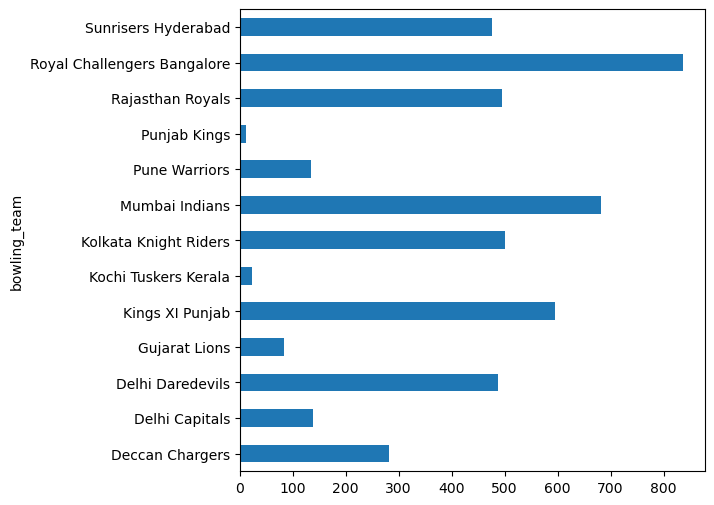

In [16]:
#runs of Dhoni against other teams

plt.figure(figsize=(6, 6))
dhoni.groupby(['bowling_team'])['runs_off_bat'].sum().plot(kind='barh')
plt.show()

In [17]:
dhoni.groupby(['year'])['runs_off_bat'].sum().sort_values(ascending=False)

year
2013    461
2018    455
2019    416
2008    414
2011    392
2015    372
2014    371
2012    358
2009    332
2017    290
2010    287
2016    284
2020    200
2021    114
Name: runs_off_bat, dtype: int64

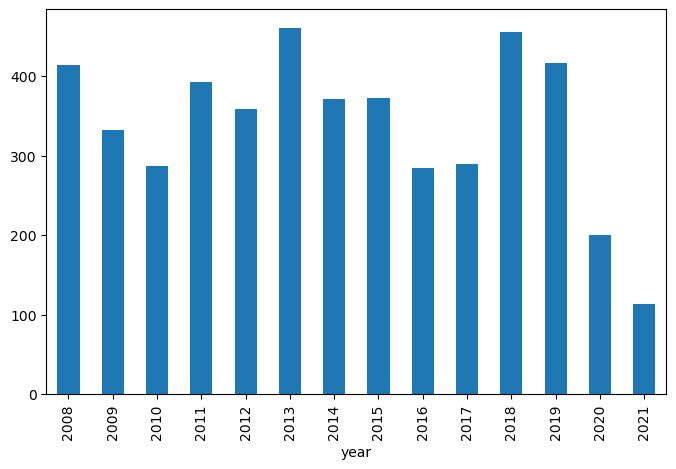

In [18]:
#the runs of Dhoni over the years

plt.figure(figsize=(8, 5))
(dhoni.groupby(['year'])['runs_off_bat'].sum()).plot(kind='bar' )
plt.show()

## The ability of MS Dhoni to hit Boundaries in Slog Overs

In [19]:
dhoni_slog = dhoni[(dhoni['ball']>=15) & (dhoni['ball']<=20)]

In [20]:
dhoni_slog.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
207128,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,18.6,Chennai Super Kings,Delhi Capitals,MS Dhoni,MM Ali,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
207130,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
207131,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.3,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
207132,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.4,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
207133,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.5,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [21]:
dhoni_slog.shape

(1703, 23)

In [22]:
dhoni_boundary = dhoni[(dhoni['runs_off_bat'] == 6) | (dhoni['runs_off_bat'] == 4)]

In [23]:
dhoni_boundry_slog = dhoni_boundary[(dhoni_boundary['ball']>=15) & (dhoni_boundary['ball']<=20)]

In [24]:
dhoni_boundry_slog.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
204183,1254091,2021,2021-09-30,Sharjah Cricket Stadium,2,18.5,Chennai Super Kings,Sunrisers Hyderabad,MS Dhoni,AT Rayudu,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
207127,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,18.5,Chennai Super Kings,Delhi Capitals,MS Dhoni,MM Ali,Avesh Khan,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
207130,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
207131,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.3,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
207133,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.5,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [25]:
#Dhoni took balls to hit a boundary in slog overs 

boundary = len(dhoni_slog)/len(dhoni_boundry_slog)
print("For every {} balls Dhoni has ability to hit a boundry in slog overs".format(int(boundary)))

For every 4 balls Dhoni has ability to hit a boundry in slog overs


## Analysis of Batsman's performance in slog overs for last 5 years(2017-2021)

In [26]:
data_last_5_years = data[(data['season']>=2017) & (data['season']<=2021)]

In [27]:
data_last_5_years.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208036,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.4,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,VR Iyer,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.5,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.6,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,12.6,Chennai Super Kings,Kolkata Knight Riders,RV Uthappa,F du Plessis,CV Varun,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
slog_batsman_df1 = pd.DataFrame(data_last_5_years[(data_last_5_years['ball']>=15) & (data_last_5_years['ball']<=20)].groupby(['striker'])['runs_off_bat'].sum())

In [29]:
slog_batsman_df2 = pd.DataFrame(data_last_5_years[(data_last_5_years['ball']>=15) & (data_last_5_years['ball']<=20)].groupby(['striker'])['ball'].count())

In [30]:
slog_batsman_df3 = slog_batsman_df1.merge(slog_batsman_df2, on='striker', how='left')

In [31]:
slog_batsman_df3['strike_rate'] = 100 *  (slog_batsman_df3['runs_off_bat']/slog_batsman_df3['ball'])

In [32]:
slog_batsman_df3 = slog_batsman_df3[slog_batsman_df3['ball']>=100]

In [33]:
slog_batsman_df3 = slog_batsman_df3.reset_index()

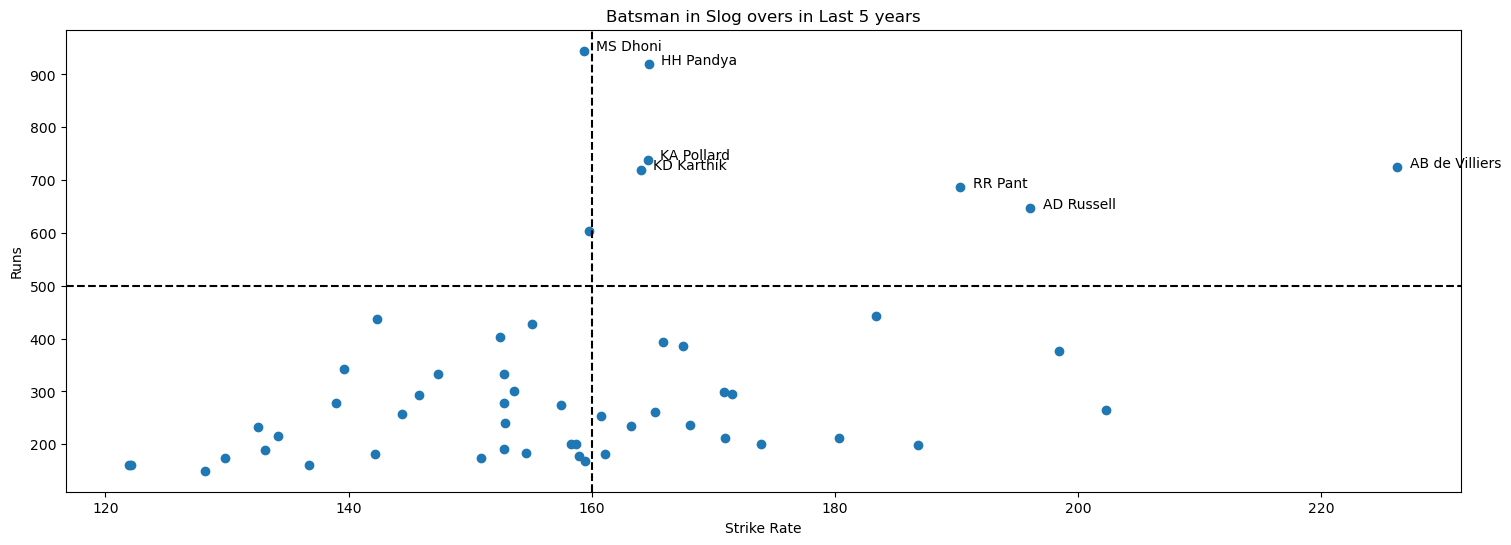

In [34]:
plt.figure(figsize=(18,6))
plt.scatter(slog_batsman_df3['strike_rate'], slog_batsman_df3['runs_off_bat'])
plt.title("Batsman in Slog overs in Last 5 years")
plt.xlabel("Strike Rate")
plt.ylabel("Runs")
plt.axhline(500, ls="--", color='black')
plt.axvline(160, ls="--", color='black')

for i in range(len(slog_batsman_df3)):
    if (slog_batsman_df3['strike_rate'][i] >= 160) & (slog_batsman_df3['runs_off_bat'][i]>=500) | (slog_batsman_df3['striker'][i] == 'MS Dhoni'):
        plt.text(x=slog_batsman_df3['strike_rate'][i]+1, y=slog_batsman_df3['runs_off_bat'][i], s=slog_batsman_df3['striker'][i])

## Team Contribution

In [35]:
#Team runs contribution of Dhoni in CSK

TC_dhoni = sum(dhoni['runs_off_bat'])/sum(data[data['batting_team'] == 'Chennai Super Kings']['runs_off_bat']) * 100
print("{}%".format(TC_dhoni))

16.050593527004633%


## Analysis of MS Dhoni's Strike Rate and Runs Over the years(2008-2021)

In [36]:
df1 = pd.DataFrame(dhoni.groupby(['season'])['runs_off_bat'].sum())

In [37]:
df2 = pd.DataFrame(dhoni.groupby(['season'])['ball'].count())

In [38]:
df3 = df1.merge(df2, on='season', how='left')

In [39]:
df3 = df3.reset_index()

In [40]:
df3.head()

,season,runs_off_bat,ball
0,2008,414,319
1,2009,332,270
2,2010,287,215
3,2011,392,247
4,2012,358,283


In [41]:
df3['strike_rate'] = 100 * (df3['runs_off_bat']/df3['ball'])

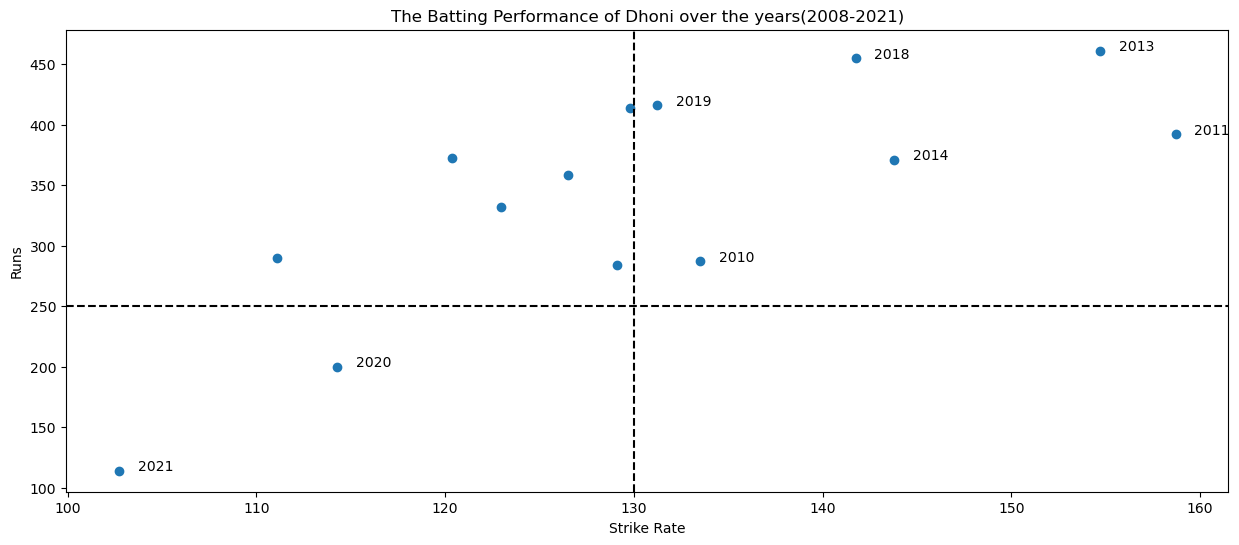

In [42]:
plt.figure(figsize=(15,6))
plt.scatter(df3['strike_rate'], df3['runs_off_bat'])
plt.axhline(250, ls="--", color='black')
plt.axvline(130, ls="--", color='black')
plt.title("The Batting Performance of Dhoni over the years(2008-2021)")
plt.xlabel("Strike Rate")
plt.ylabel("Runs")
for i in range(len(df3)):
    if (df3['strike_rate'][i] >=130) & (df3['runs_off_bat'][i]>=250) | (df3['strike_rate'][i] < 130) & (df3['runs_off_bat'][i] <250):
        plt.text(x=df3['strike_rate'][i]+1, y=df3['runs_off_bat'][i], s=df3['season'][i])